## Approximation theorem with neural network

Approximation of (cos(pi/2 t), sin(pi/2 t)), t in [0,1] with two hidden layers (1,20,20,2) sigmoid function as an activation.

**Initialization of the neural network**

In [38]:
from random import random
from random import seed
#as we have 2 hidden layers, we need to precise as arg the number of neurons contained in each layer

def initialize_network(n_inputs, n_hidden_1,n_hidden_2, n_outputs):
  network=[]
  #first hidden layer
  hidden_layer_1=[{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden_1)]
  network.append(hidden_layer_1)
  #second hidden layer
  hidden_layer_2=[{'weights':[random() for i in range(n_hidden_1 + 1)]} for i in range(n_hidden_2)]
  network.append(hidden_layer_2)
  #output layer
  output_layer=[{'weights':[random() for i in range(n_hidden_2 + 1)]} for i in range(n_outputs)]
  network.append(output_layer)
  return network


In [39]:

#test of the function
seed(123)
network=initialize_network(1,20,20,2)
#the network is initialized without issue
for layer in network:
  print(len(layer))

20
20
2


In [40]:
#activation function
def activate(weights, inputs):
  activation=weights[-1] #init with the bias
  for i in range(len(weights)-1):
    activation+=weights[i]*inputs[i]
  return activation

#transfer function, we implement the sigmoid function
from math import exp
def transfer(activation):
  return 1.0/(1.0 + exp(-activation))

Function to propagate the input through the network

In [41]:
def forward_propagate(network, row):
  #row represent the input value, in our case the input is just a simple number 
  #but along the network it will evolve with several values given the number of neuron in each layer
  inputs=row
  for layer in network:
    new_inputs=[]
    for neuron in layer:
      activation=activate(neuron['weights'],inputs)
      neuron['output']=transfer(activation)
      new_inputs.append(neuron['output'])
    inputs=new_inputs
  return inputs
  #at the end of the function, inputs represent the output values

In [42]:
#test of the propagation function 
row=[0.5]
forward_propagate(network,row)
for neuron in network[-1]:
  print(neuron['output'])

0.9999414500869123
0.9999518580902553


In [43]:
# derivative of the sigmoid transfer function
def transfer_derivative(output):
  return output*(1.0- output)


Now that we can propagate the values from the input to the output, we need to make a u-turn in order to make our network learn from its mistakes

In [44]:
def backward_propagate_error(network, expected):
  #expected is the expected output 

  #we browse the network from the output
  for i in reversed(range(len(network))):
    layer=network[i]
    errors=[]
    #for the other layers
    #we propagte the error by giving it the appropriated weight 
    if i != len(network)-1:
      for j in range(len(layer)):
        error=0.0
        for neuron in network[i+1]:
          error+= (neuron['weights'][j]*neuron['delta'])
          errors.append(error)
    #for the output layer
    # compute the error as the difference between the output and the expected value
    else:
      for j in range(len(layer)):
        neuron=layer[j]
        errors.append(expected[j]-neuron['output'])
    # setting the delta parameter for each neuron in the layer
    for j in range(len(layer)):
      neuron=layer[j]
      neuron['delta']=errors[j]*transfer_derivative(neuron['output'])



In [45]:
#test 
row=[0.1]
forward_propagate(network,row)
expected=[0.4,0.5]
backward_propagate_error(network, expected)
print(network[0][0])

{'weights': [0.052363598850944326, 0.08718667752263232], 'output': 0.5230893259052121, 'delta': -2.7631991541697763e-10}


Now we have the done the generic part (exept for the number of layers that is fixed as we want).
Now we want to make our network adapted to approximate the wanted functions.

In [46]:
def update_weights(network, row, learning_rate):
  for i in range(len(network)):
    #row is the initial inputs
    outputs=row
    if i!=0:
      outputs=[neuron['output']for neuron in network[i-1]]
    for neuron in network[i]:
      for j in range(len(outputs)):
        #updating the weights
        neuron['weights'][j] += learning_rate*neuron['delta']*outputs[j]
      neuron['weights'][-1]+=learning_rate*neuron['delta'] #updating the bias

In [47]:
#test
row=[0.5]
forward_propagate(network,row)
expected=[0.4,0.5]
backward_propagate_error(network, expected)
update_weights(network,row,0.2)
print(network[0][0])

{'weights': [0.05236359883325462, 0.08718667748725291], 'output': 0.5283118028185826, 'delta': -1.7689706684351785e-10}


Finally, as we have all the functions we need, we can summarize all the functions in one training method in order to make the network learn from the dataset given in input.

In [48]:
import numpy as np

def train_network(network, train, learning_rate, n_epoch, n_outputs):
  for epoch in range(n_epoch):
    sum_error=0
    for row in train:
     #warning : the rows are meant to be lists, even if the length is 1
      outputs=forward_propagate(network,row)
      expected=[np.sin(np.pi/2*row[0]),np.cos(np.pi/2*row[0])]
      sum_error+=sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])/len(expected)
      backward_propagate_error(network,expected)
      update_weights(network,row, learning_rate)
    print('>epoch=%d, learning rate=%.3f, error=%.3f' % (epoch, learning_rate, sum_error))

### Testing the neural network

All the functions are ready, now we need to set the training and the testing sets to see how the network behaves. First we will train the model with inputs only between 0 and 1

In [49]:
samples_number=5000
test=[random() for i in range(samples_number)]
expected=[]
dataset=[]
for j in range(samples_number):
  dataset.append([random()])
  expected.append([np.sin(np.pi/2*test[j]), np.cos(np.pi/2*test[j])])

In [50]:
seed(123)
network=initialize_network(1,20,20,2)
train_network(network, dataset, 0.5, 20, 2)

>epoch=0, learning rate=0.500, error=1108.246
>epoch=1, learning rate=0.500, error=647.466
>epoch=2, learning rate=0.500, error=619.354
>epoch=3, learning rate=0.500, error=602.967
>epoch=4, learning rate=0.500, error=325.544
>epoch=5, learning rate=0.500, error=9.574
>epoch=6, learning rate=0.500, error=8.347
>epoch=7, learning rate=0.500, error=7.498
>epoch=8, learning rate=0.500, error=6.858
>epoch=9, learning rate=0.500, error=6.291
>epoch=10, learning rate=0.500, error=5.730
>epoch=11, learning rate=0.500, error=5.158
>epoch=12, learning rate=0.500, error=4.596
>epoch=13, learning rate=0.500, error=4.078
>epoch=14, learning rate=0.500, error=3.628
>epoch=15, learning rate=0.500, error=3.255
>epoch=16, learning rate=0.500, error=2.952
>epoch=17, learning rate=0.500, error=2.706
>epoch=18, learning rate=0.500, error=2.503
>epoch=19, learning rate=0.500, error=2.334


In [51]:
def predict(network,row):
  outputs=forward_propagate(network, row)
  return outputs

In [52]:
#test if the prediction function works as we want
a=0
prediction=predict(network, [a])
prediction

[0.07671557826340387, 0.9819083889654132]

In [53]:
#get the prediction for the dataset
y_hat=[predict(network, [test[i]]) for i in range(len(test))]
print(y_hat[0:10])

[[0.15307895250378148, 0.9651914978280388], [0.8926266317740629, 0.42056100581243694], [0.9469747904927514, 0.22851543835898983], [0.932670010154695, 0.2860312494697776], [0.9596849470361425, 0.17338837042702498], [0.8251888103993125, 0.5766026710786931], [0.4932781924037682, 0.8637356787843827], [0.25606282858500146, 0.9406626997603442], [0.8570418758096126, 0.5119175060393069], [0.976482117284695, 0.09648310083710225]]


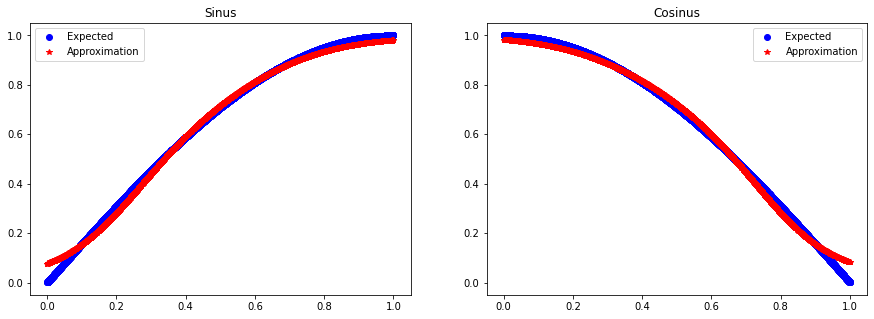

In [54]:
#comparing the predictions and the actual results if of the functions
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Sinus')
plt.plot(test, [y[0] for y in expected], 'bo', label='Expected')
plt.plot(test, [y_h[0] for y_h in y_hat], 'r*', label='Approximation')
plt.legend()
plt.subplot(122)
plt.title('Cosinus')
plt.plot(test, [y[1] for y in expected], 'bo',label='Expected')
plt.plot(test, [y_h[1] for y_h in y_hat], 'r*',label='Approximation')
plt.legend()


### Try outside [0,1]

To test how the neural network is really effective approximating the functions, we need to test it outside the interval it has been trained with to see if it actually makes good predictions.

We will try inputs between [0,3] to begin

In [55]:
from random import uniform
test2=[uniform(0,3) for i in range(samples_number)]
expected2=[[np.sin(np.pi/2*test2[j]), np.cos(np.pi/2*test2[j])]for j in range(samples_number)]

In [56]:
#test if the testing set is well balanced
print(np.mean(test2))

1.5116871246793318


In [57]:
#get the prediction of the models
y_hat2=[predict(network, [test2[i]]) for i in range(len(test2))]
print(y_hat2[0:10])

[[0.43293970805783577, 0.887329806817367], [0.9972271204941031, 0.00802234567976195], [0.9973825309864993, 0.007583780320986333], [0.9973459956097253, 0.00768372875069164], [0.9974132934679346, 0.007501748015385821], [0.9969329687766353, 0.008916431360070077], [0.9797805043347337, 0.08125228386926188], [0.7653205654409487, 0.6675946245130551], [0.9970909462533301, 0.008428248192764172], [0.9974524058707663, 0.007401623150882833]]


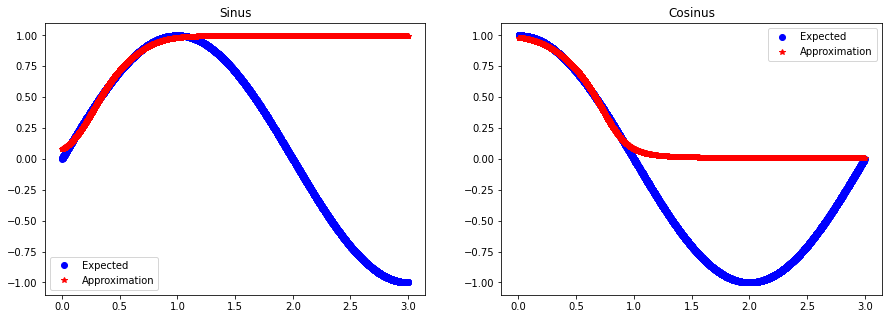

In [58]:
#comparing the predictions and the actual results if of the functions
fig=plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Sinus')
#printing only the sinus app. and expected values
plt.plot(test2, [y[0] for y in expected2], 'bo', label='Expected')
plt.plot(test2, [y_h[0] for y_h in y_hat2], 'r*', label='Approximation')
plt.legend()
plt.subplot(122)
#printing only the cosinus app. and expected values
plt.title('Cosinus')
plt.plot(test2, [y[1] for y in expected2], 'bo',label='Expected')
plt.plot(test2, [y_h[1] for y_h in y_hat2], 'r*',label='Approximation')
plt.legend()

As we can see the network is not capable of generelazing the approximation is boths cases, once the border of the training set is reached (x>1) the network does not know how to predict the values.

**Hypothesis:** As sinus and cosinus functions are 2pi periodics, maybe if we train the model on a dataset taking values from [0,2] or [0,4] to have two periods, it will be capable of generalizing the functions on all R.